In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from mpl_toolkits.mplot3d import Axes3D #3d plots
from sklearn.neighbors import NearestNeighbors 
import os
import math #math fun

In [45]:
data = pd.read_csv('/home/tincho/Desktop/TP/osc15-EST-01.csv',decimal=",")

In [3]:
data.head()

Tiempo    Unnamed: 1  Velocidad     Unnamed: 3      R  Unnamed: 5     T  \
0       3  2.238806e+09         30  2079692300624  26914          57  9107   
1       4  2.985075e+09         29  8882077304442  26914          57  9075   
2       5  3.731343e+09         29  5691104985314  26830          73  9043   
3       6  4.477612e+09         29  2507059352231  26914          57  9012   
4       7  5.223881e+09         28   933022379768  27249          93  9012   

   Unnamed: 7  
0          59  
1          75  
2          91  
3           7  
4           7

In [46]:
type(data)

pandas.core.frame.DataFrame

In [47]:
data.columns

Index(['Tiempo', 'Unnamed: 1', 'Velocidad', 'Unnamed: 3', 'R', 'Unnamed: 5',
       'T', 'Unnamed: 7'],
      dtype='object')

In [48]:
datosNP=data.to_numpy()

In [49]:
Tiempo=np.float64(datosNP[:,0])
Velocidad=np.float64(datosNP[:,2])
R=np.float64(datosNP[:,4])
T=np.float64(datosNP[:,6])

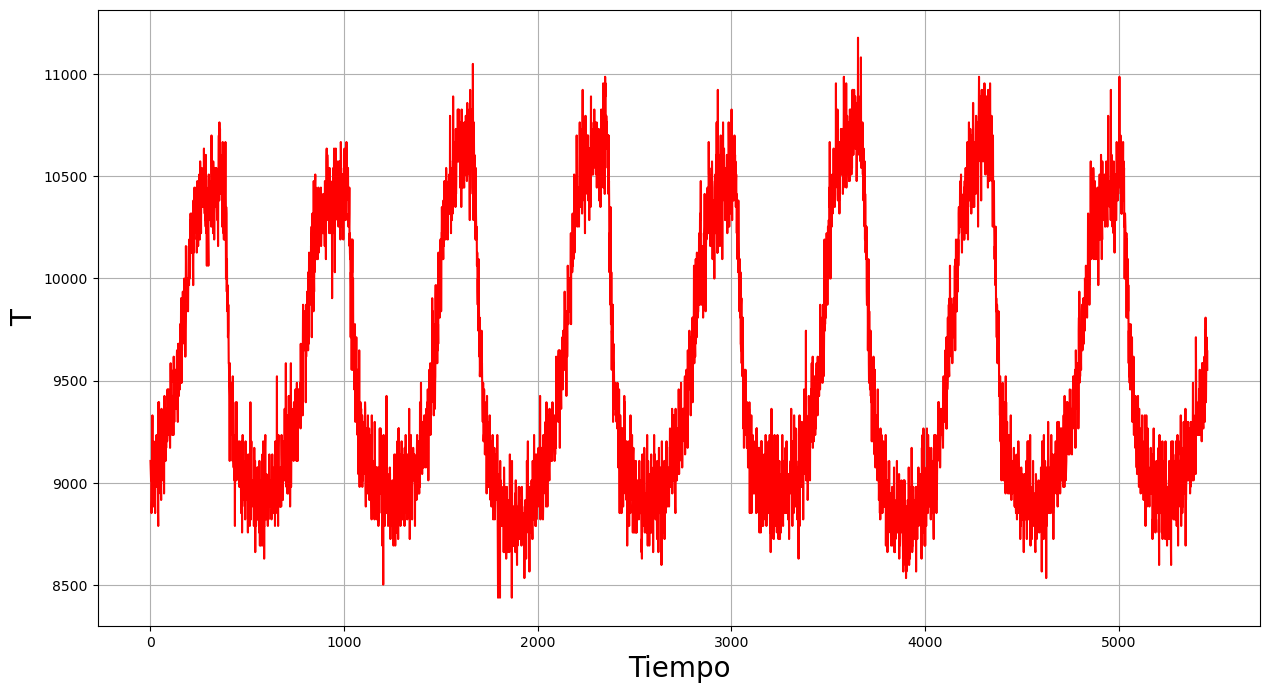

In [8]:
plt.figure(figsize=(15,8),)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('T', fontsize=20)
plt.plot(T, color = 'red')
plt.grid()
plt.show()

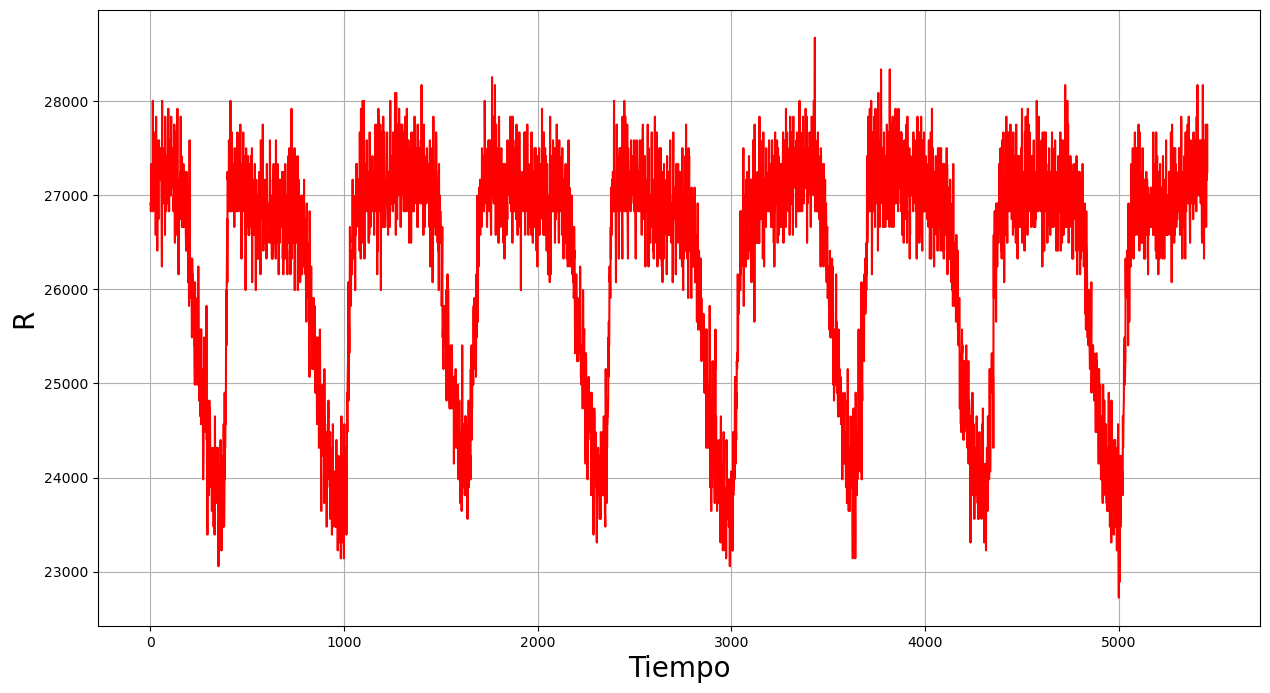

In [9]:
plt.figure(figsize=(15,8),)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('R', fontsize=20)
plt.plot(R, color = 'red')
plt.grid()
plt.show()

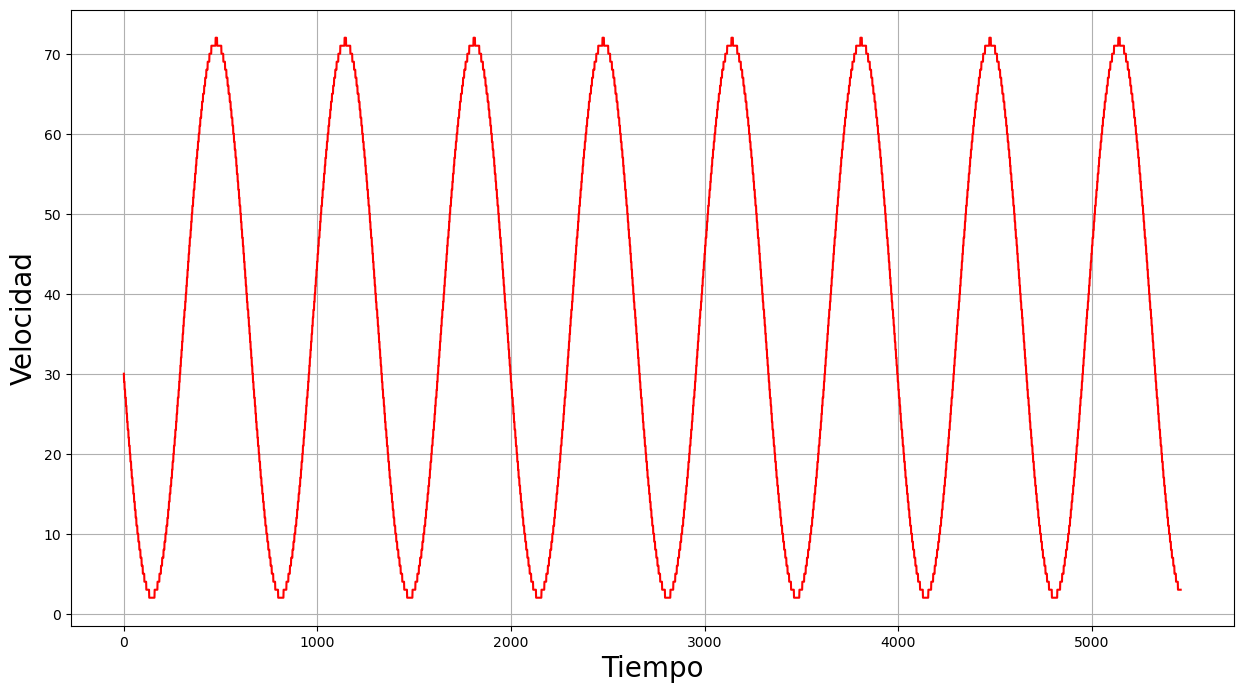

In [10]:
plt.figure(figsize=(15,8),)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('Velocidad', fontsize=20)
plt.plot(Velocidad, color = 'red')
plt.grid()
plt.show()

<ipython-input-16-d002a0fa241f>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data['R'],model='additive', freq=40)


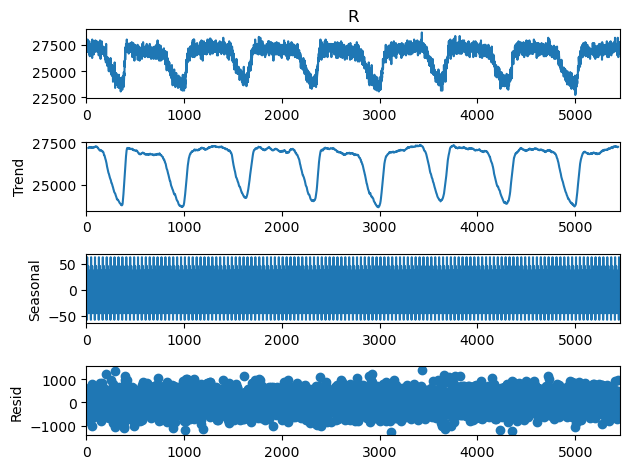

In [16]:
descomposicion = sm.tsa.seasonal_decompose(data['R'],model='additive', freq=40)  
fig = descomposicion.plot()

plt.show()

<ipython-input-12-4a04ca33172b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data['T'],model='additive', freq=30)


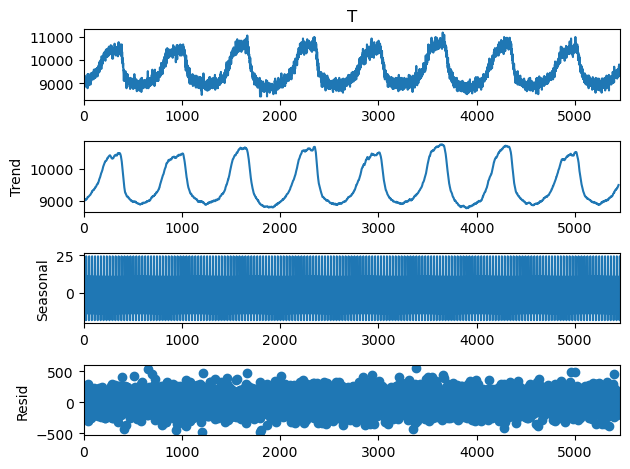

In [12]:
descomposicion = sm.tsa.seasonal_decompose(data['T'],model='additive', freq=30)  
fig = descomposicion.plot()

plt.show()

<ipython-input-13-736007f64a96>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data['R'],model='multiplicative', freq=50)


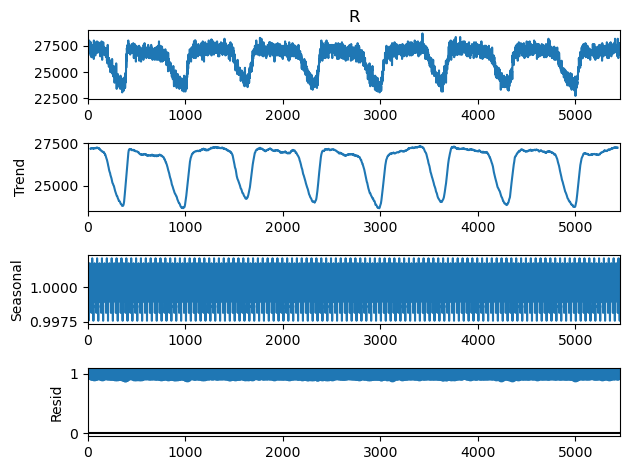

In [13]:
descomposicion = sm.tsa.seasonal_decompose(data['R'],model='multiplicative', freq=50)  
fig = descomposicion.plot()

plt.show()

<ipython-input-18-b1fe48a7cb01>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data['T'],model='multiplicative', freq=50)


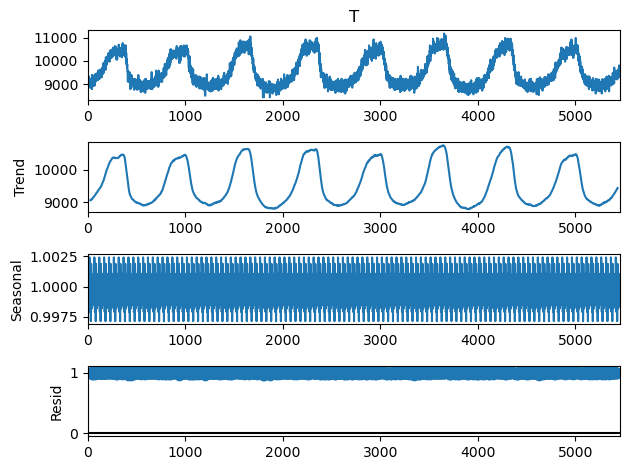

In [18]:
descomposicion = sm.tsa.seasonal_decompose(data['T'],model='multiplicative', freq=50)  
fig = descomposicion.plot()

plt.show()

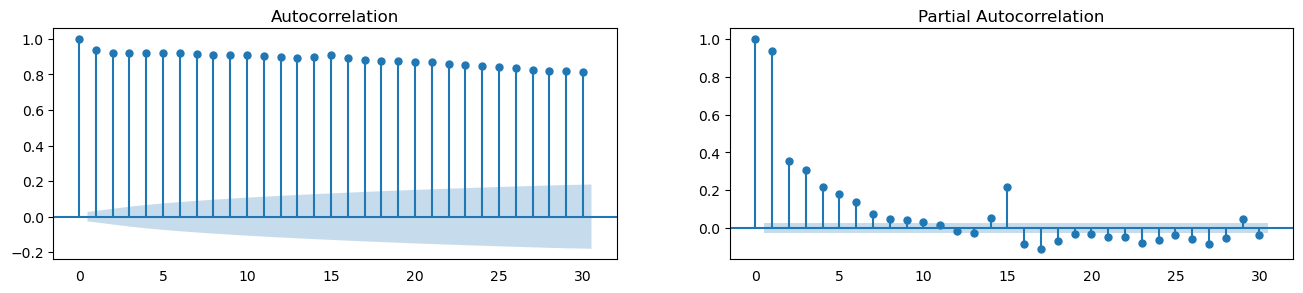

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('/home/tincho/Desktop/TP/osc15-EST-01.csv')



# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.R.tolist(), lags=30, ax=axes[0])
plot_pacf(df.R.tolist(), lags=30, ax=axes[1])

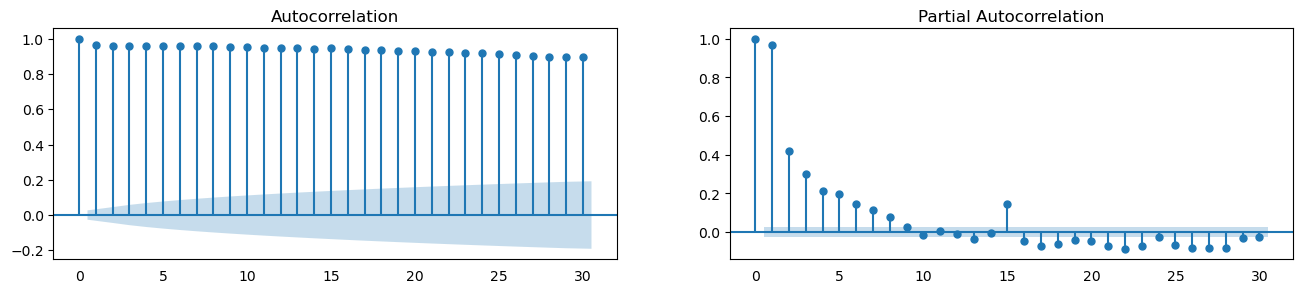

In [25]:
columT= df['T']
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(columT.tolist(), lags=30, ax=axes[0])
plot_pacf(columT.tolist(), lags=30, ax=axes[1])

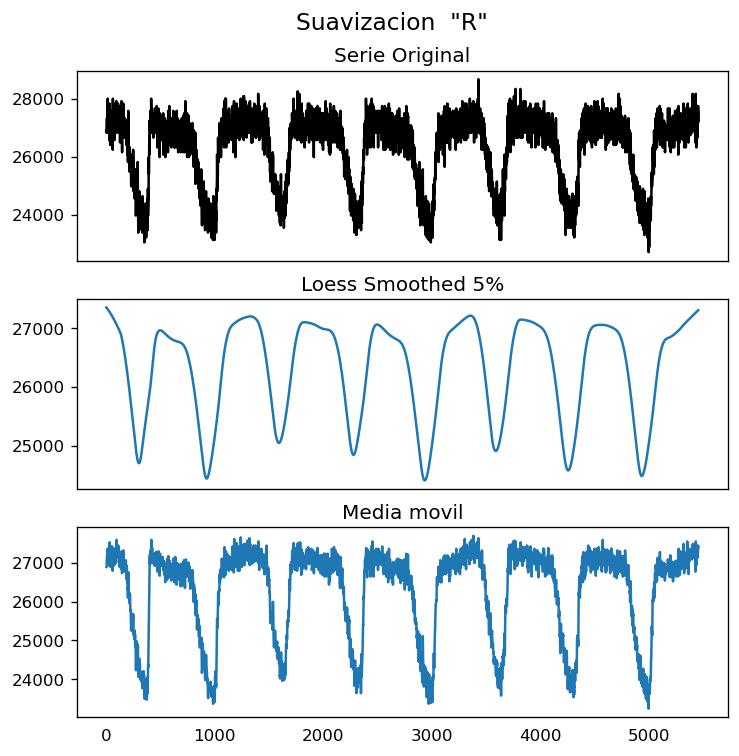

In [108]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('/home/tincho/Desktop/TP/osc15-EST-01.csv')

# 1. Moving Average
df_ma = df_orig.R.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.R, np.arange(len(df_orig.R)), frac=0.05)[:, 1], index=df_orig.index, columns=['R'])
#df_loess_15 = pd.DataFrame(lowess(df_orig.R, np.arange(len(df_orig.R)), frac=0.15)[:, 1], index=df_orig.index, columns=['R'])
# Plot
fig, axes = plt.subplots(3,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['R'].plot(ax=axes[0], color='k', title='Serie Original')
df_loess_5['R'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_ma.plot(ax=axes[2], title='Media movil')
fig.suptitle('Suavizacion  "R"', y=0.95, fontsize=14)
plt.show()

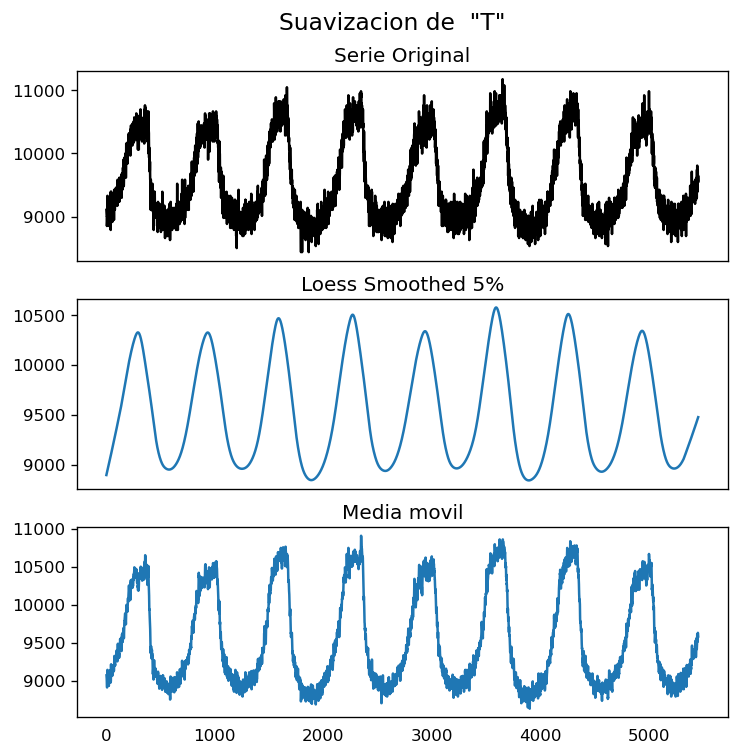

In [93]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('/home/tincho/Desktop/TP/osc15-EST-01.csv')

# 1. Moving Average
df_ma = columT.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(columT, np.arange(len(columT)), frac=0.05)[:, 1], index=df_orig.index, columns=['T'])

#df_loess_15 = pd.DataFrame(lowess(df_orig.T, np.arange(len(df_orig.T)), frac=0.15)[:, 1], index=df_orig.index, columns=['T'])

# Plot
fig, axes = plt.subplots(3,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['T'].plot(ax=axes[0], color='k', title='Serie Original')
df_loess_5['T'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_ma.plot(ax=axes[2], title='Media movil')
fig.suptitle('Suavizacion de  "T"', y=0.95, fontsize=14)
plt.show()

/home/tincho/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


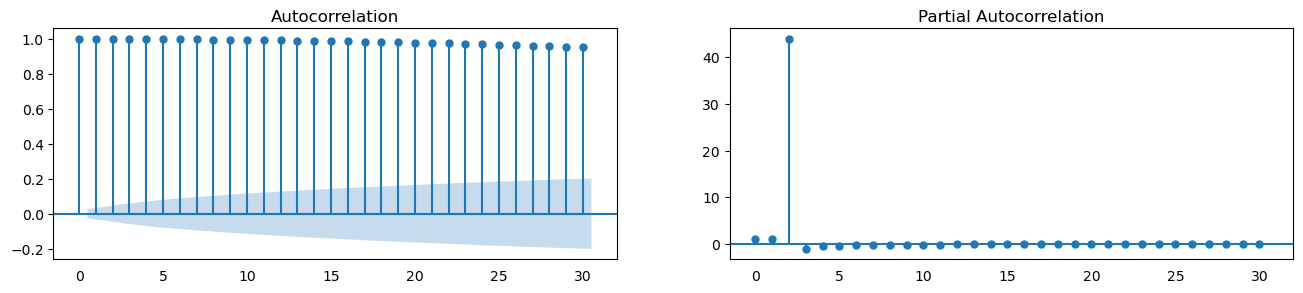

In [35]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_loess_5['T'].tolist(), lags=30, ax=axes[0])
plot_pacf(df_loess_5['T'].tolist(), lags=30, ax=axes[1])

In [ ]:
#Hago componentes principales y luego FFT
#Script Horacio

In [119]:
X=np.c_[R,T]

In [120]:
xraya=np.mean(X,0)
B=X-xraya
Bt=np.transpose(B)
N=len(R)
A=(Bt@B)/N
A

array([[1402927.43372959, -658167.26788636],
       [-658167.26788636,  420794.66776105]])

In [121]:
E=np.linalg.eigh(A)
print(E[0])
print(E[1])

[  90684.85466177 1733037.24682887]
[[-0.44832819 -0.89386903]
 [-0.89386903  0.44832819]]


In [122]:
V=np.flip(E[1],1)

In [123]:
Z=B@V

In [124]:
z1=Z[:,0]
z2=Z[:,1]

In [125]:
from scipy.signal import butter, lfilter, freqz
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
# Parámetros de filtro.
order = 2
fs = 16377.87       # taza de muestreo, en Hz se lo sabe del equipo
cutoff = 1000.0  # frecuencia de corte, Hz
# coeficientes del filtro}
b, a = butter_lowpass(cutoff, fs, order)


In [126]:
# ahora se filtra los datos,,,
z1_f = butter_lowpass_filter(z1, cutoff, fs, order)

In [127]:
z1_fft=np.fft.fft(z1_f)

In [128]:
freq = np.fft.fftfreq(Tiempo.shape[-1])

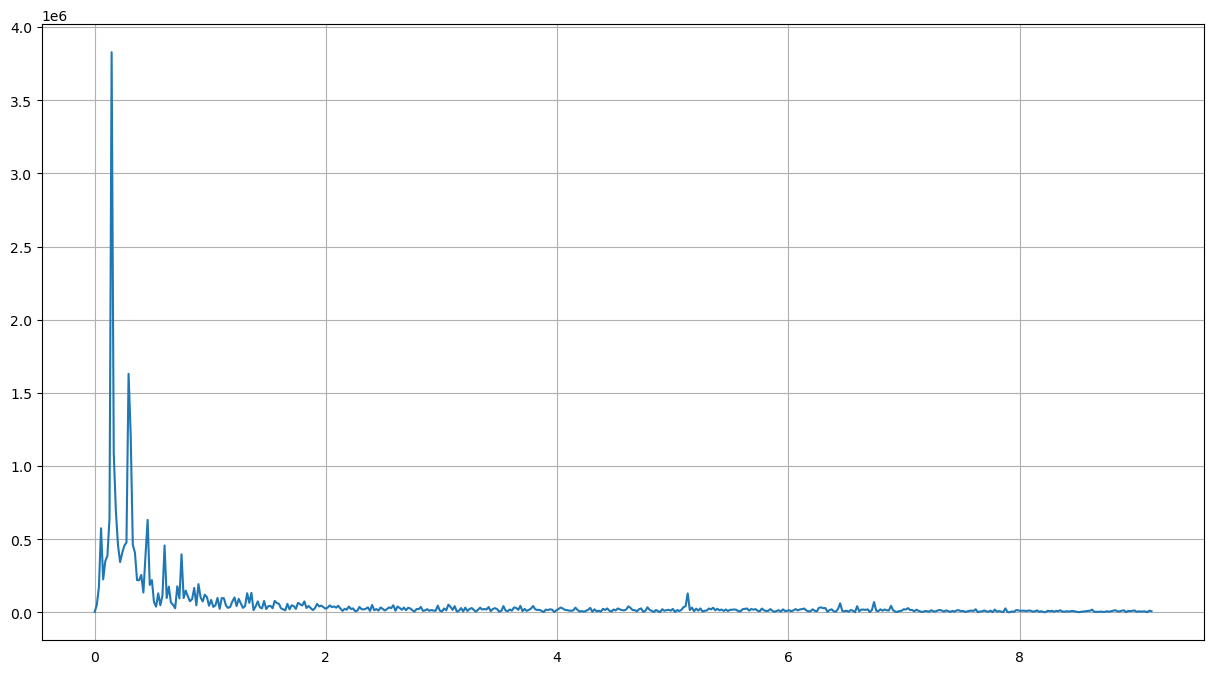

In [129]:
plt.figure(figsize=(15,8))
plt.plot(100*freq[0:500],np.abs(z1_fft[0:500]))
plt.grid()
plt.show()